# Лекция 11. Тестирование и покрытие

- Тестирование... Зачем?
- Виды тестирования
- Принципы unit-тестирования
- Инструменты тестирования: doctest, assert, unittest, pytest
- Покрытие

## Нужно ли тестировать?

__За:__ 
- тесты проверяют корректность кода 
- и позволяют бесстрашно изменять код даже в больших проектах. 

__Против:__ 
- написание тестов требует времени, 
- нередко в проекте тестов больше чем кода, 
- работающие тесты не гарантируют корректность. 


__Итог:__
> Несмотря на все трудности, тестировать конечно же нужно!!


## Классификация видов тестирования
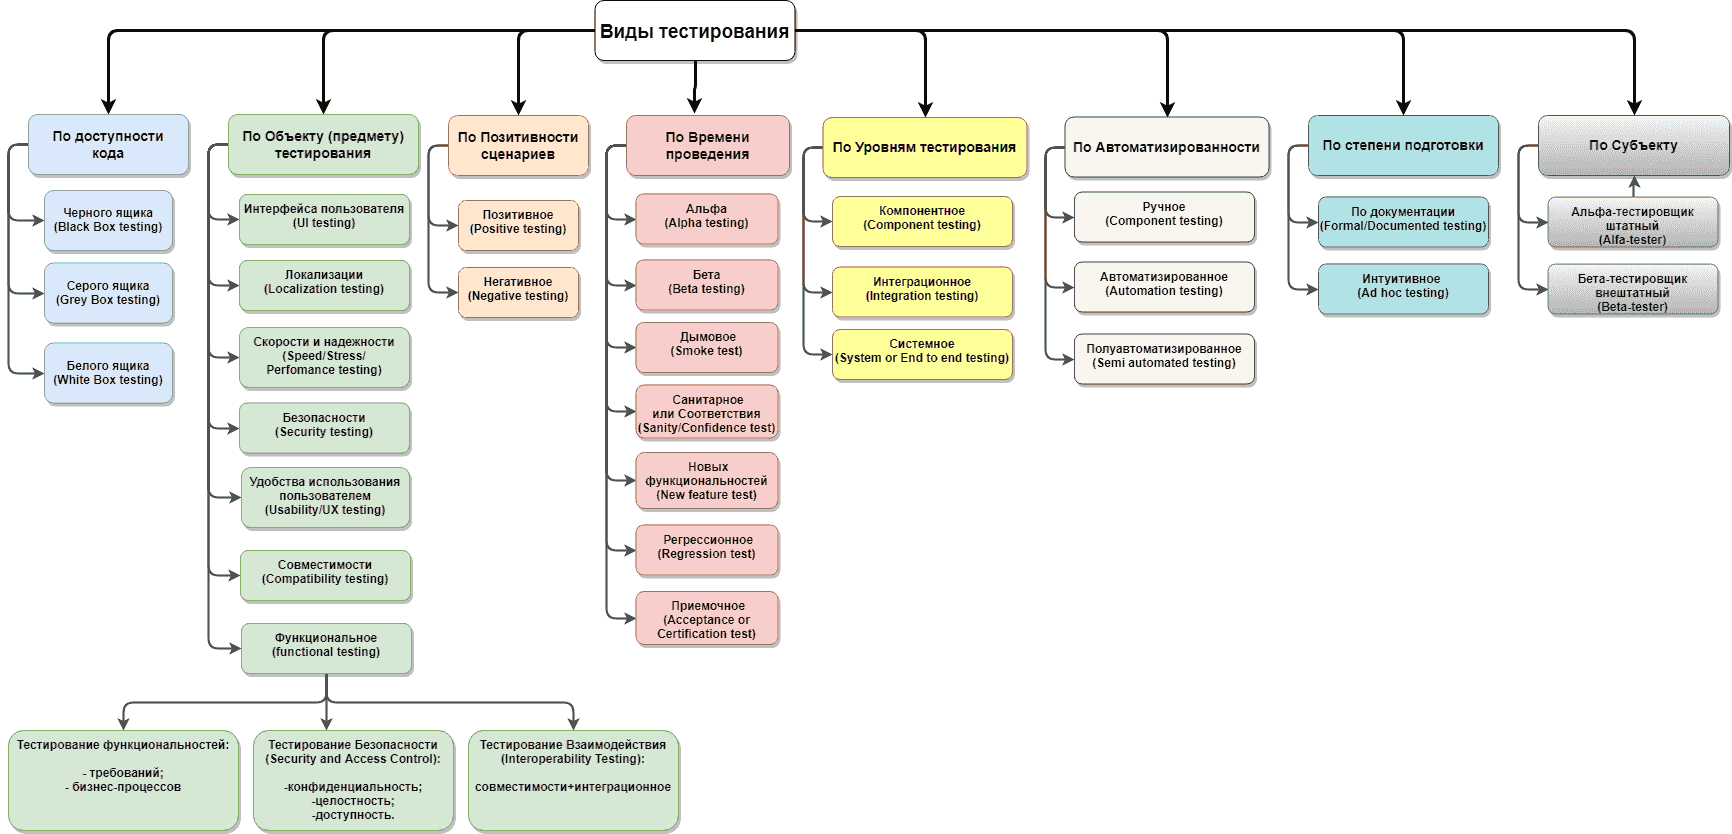

## Пирамида тестирования
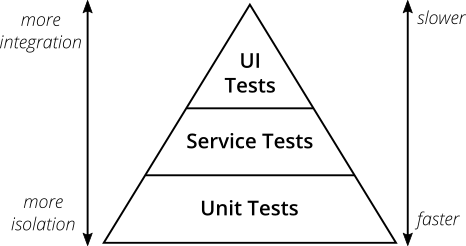

## Модульное (unit) тестирование
__Компонентное (модульное) тестирование__ проверяет функциональность и ищет дефекты в частях приложения, которые доступны и могут быть протестированы по-отдельности (модули программ, объекты, классы, функции и т.д.).  

__Тестовый случай (test case)__ - описание последовательности действий и ожидаемого результата для проверки работы определённого функционала.

__Набор тестов (test suite)__ - несколько тестовых случаев, наборов тестов или и того и другого. Он используется для объединения тестов, которые должны быть выполнены вместе.

### Хорошие практики unit-тестирования
1. Test Case должен проверять корректность работы небольшого модуля программы.
1. Каждый Test Case должен быть независимым, должен иметь возможность быть запущенным в одиночку.
1. Test Suite может иметь «стартовые» и «завершающие» действия, например, создание временной базы данных, на которой будет происходить тестирование.
1. Рекомендуется делать тесты «быстрыми», сложные тесты, которые быстрыми не сделать, лучше отделять в отдельный Test Suite.
1. Всегда запускайте тесты до и после разработки новой «фичи».
1. Запускать тесты «хуком» push в GIT - хорошая идея.
1. Первый шаг отладки кода - написание теста.
1. Первый шаг разработки кода - написание теста (подход TDD).
1. Используйте длинные и детальные имена для Test Case’ов.
1. Изучение существующих тестов - способ изучения кода.

## Инструменты unit-тестирования

### Тестируемая функция

In [ ]:
def sqrt(value):
    """
    :param value: source value
    :type value: int
    :return: float --result of calculation
    """
    if value <= 0:
        raise ValueError('Positive value required')

    return value ** 0.5

### doctest
https://docs.python.org/3/library/doctest.html  
Модуль __doctest__ позволяет проверить реализацию функции на соответствие записанному сеансу интерпретатора.

In [5]:
def sqrt(value):
    """
    :param value: source value
    :type value: int
    :return: float --result of calculation
    
    >>> sqrt(9)
    3.01 fdjfdkflddklfjkldljlj

    >>> sqrt(-1)
    Traceback (most recent call last):
      ...
    ValueError: Positive value required
    """
    if value <= 0:
        raise ValueError('Positive value required')

    return value ** 0.5

In [6]:
import doctest
doctest.testmod(verbose=True)

Trying:
    sqrt(9)
Expecting:
    3.01
**********************************************************************
File "__main__", line 7, in __main__.sqrt
Failed example:
    sqrt(9)
Expected:
    3.01
Got:
    3.0
Trying:
    sqrt(-1)
Expecting:
    Traceback (most recent call last):
      ...
    ValueError: Positive value required
ok
1 items had no tests:
    __main__
**********************************************************************
1 items had failures:
   1 of   2 in __main__.sqrt
2 tests in 2 items.
1 passed and 1 failed.
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=2)

__Плюсы:__ 
- доступен в стандартной библиотеке, 
- решает задачу тестирования для небольших проектов, 
- их легко читать, 
- примеры кода в документации всегда актуальны. 

__Минусы:__ 
- доктесты требуют, чтобы у результата было содержательное строковое представление, 
- длинные доктесты ухудшают читаемость документации, 
- нет способа запустить подмножество доктестов, 
- если в середине доктеста произошла ошибка, оставшаяся часть не выполнится.

### assert
Оператор __assert__ принимает два аргумента: условие и произвольное значение.
Если условие не выполняется, оператор поднимает исключение __AssertionError__. 
Второй аргумент оператора assert используется для сообщения об ошибке

In [ ]:
def test_square_root_of_9_positive():
    assert sqrt(9) == 3.0


def test_square_root_of_negative():
    try:
        sqrt(-1)
    except ValueError as e:
        assert e.args[0] == 'Positive value required', \
            'Wrong exception was raised'
        return

    assert False, 'No exception raised'

In [ ]:
test_square_root_of_9_positive()
test_square_root_of_negative()

__Плюсы:__
- тесты c assert легко читать, 
- они не используют ничего кроме стандартных средств языка, 
- в отличие от доктестов это обычные функции. 

__Минусы:__ 
- запускать тесты нужно вручную, 
- их сложно отлаживать, 
- для каждого типа утверждения приходится самостоятельно конструировать сообщение об ошибке.

### unittest
https://docs.python.org/3/library/unittest.html  
Модуль __unittest__ реализует функциональность JUnit для тестирования кода на Python.  

Разнообразные ассерты: assertEqual, assertNotEqual, assertTrue, assertIsNone, assertIsInstance, assertRaises, ...  

_Фикстуры_ – способ подготовить контекст, в котором будут запускаться тесты. Это можно использовать, например, для работы с ресурсами: сокетами, файлами, временными директориями.

In [10]:
import unittest


class TestSqrt(unittest.TestCase):

    def test_square_root_of_9_positive(self):
        self.assertEqual(sqrt(9), 3.01)

    def test_square_root_of_negative(self):
        with self.assertRaises(ValueError) as e:
            sqrt(0)

        self.assertEqual(e.exception.args[0], 'Positive value required')

In [11]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestSqrt)
unittest.TextTestRunner(verbosity=3).run(suite)

test_square_root_of_9_positive (__main__.TestSqrt) ... FAIL
test_square_root_of_negative (__main__.TestSqrt) ... ok

FAIL: test_square_root_of_9_positive (__main__.TestSqrt)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-10-df7e5b48b8e4>", line 7, in test_square_root_of_9_positive
    self.assertEqual(sqrt(9), 3.01)
AssertionError: 3.0 != 3.01

----------------------------------------------------------------------
Ran 2 tests in 0.003s

FAILED (failures=1)


<unittest.runner.TextTestResult run=2 errors=0 failures=1>

__Плюсы:__ 
- доступен в стандартной библиотеке, 
- выводит понятные сообщения об ошибках, 
- умеет автоматически находить тесты. 

__Минусы:__ 
- API унаследован от Java, 
- заставляет писать много лишнего кода, 
- читать unittest тесты сложнее, чем доктесты и тесты, использующие assert.

### Фикстуры (fixture)
Часто, прежде чем выполнить тест или набор тестов, необходимо выполнить подготовительные действия (создать временную тестовую базу, запустить сервер), а по завершение тестов – подчистить все это.  

В _unittest.TestSuite_ есть методы, позволяющие задать такие действия для отдельного теста, класса или модуля:  

`setUp` / `teardown`  
`setUpClass` / `tearDownClass`  
`setUpModule` / `tearDownModule`  

In [ ]:
import sqlite3


def count_admins(db_path):
    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute('SELECT count(*) FROM users WHERE is_admin = true;')
    admins = int(cur.fetchone()[0])
    conn.close()

    return admins

In [ ]:
import os
import tempfile

class TestUsersAPI(unittest.TestCase):

    @classmethod
    def setUpClass(cls):
        cls._db, cls._db_path = tempfile.mkstemp()
        conn = sqlite3.connect(cls._db_path)
        cur = conn.cursor()
        cur.execute('CREATE TABLE users (username text, email text, is_admin bool);')

        test_users = [
            ('alice', 'alice@mail.com', False),
            ('bob', 'bob@mail.com', False),
            ('admin', 'admin@mail.com', True),
            ('carrol', 'carrol@mail.com', True)
        ]
        cur.executemany('INSERT INTO users VALUES (?, ?, ?);', test_users)
        conn.commit()
        conn.close()

    @classmethod
    def tearDownClass(cls):
        os.close(cls._db)
        os.unlink(cls._db_path) 

    def test_count_admins(self):
        self.assertEqual(count_admins(TestUsersAPI._db_path), 2)

### unittest.mock
Моки решают 2 задачи:  
- позволяют подменить и иммитировать объекты, которые мы не можем контролировать в ходе выполнения тестов (например, ответы от внешних HTTP-сервисов), 
- помогают выяснить, сколько раз вызывается определенный метод и с какими аргументами.

Объект __Mock()__ может подменить любой объект, т.к. его атрибуты и методы создаются налету, при вызове.  

__patch()__ находит и заменяет (временно) объект в заданном модуле на мок. Может использоваться как менеджер контекста или декоратор, чтобы задать область, в которой необходимо подменить объект. 

__patch.object()__ подменяет один метод объекта, а не сам объект.

#### Mock object

In [12]:
from unittest.mock import Mock

In [13]:
json = Mock()
json

<Mock id='1242513791944'>

#### Laziness

In [14]:
json.dumps()

<Mock name='mock.dumps()' id='1242513790600'>

In [15]:
json.some_odd_property

<Mock name='mock.some_odd_property' id='1242513832904'>

#### Assertion & Introspection

In [16]:
json.loads('{"key": "value"}')

<Mock name='mock.loads()' id='1242514040904'>

In [17]:
json.loads.assert_called()

In [18]:
json.loads.assert_called_once()

In [19]:
json.loads.assert_called_with('{"key": "value"}')

In [20]:
json.loads.assert_called_once_with('{"key": "value"}')

In [21]:
json.loads('{"key": "value"}')

<Mock name='mock.loads()' id='1242514040904'>

In [22]:
json.loads.assert_called_once()

AssertionError: Expected 'loads' to have been called once. Called 2 times.

In [23]:
json.loads.call_count

2

In [24]:
# arguments of last call
json.loads.call_args

call('{"key": "value"}')

In [25]:
json.loads.call_args_list

[call('{"key": "value"}'), call('{"key": "value"}')]

#### Managing a Mock

##### return_value

In [27]:
json.dumps.return_value = 'Hello World!!!'
assert json.dumps({'a': 1, 'b': 2, 'c': 3}) == 'Hello World!!'

AssertionError: 

##### side_effect

In [28]:
json.dumps.side_effect = ValueError
json.dumps({'a': 1, 'b': 2, 'c': 3})

ValueError: 

In [29]:
def check_for_side_effect(passed_dict):
    if 'a' in passed_dict:
        print(f'a = {passed_dict["a"]}')
        
    return 'Hello World!!!'

json.dumps.side_effect = check_for_side_effect

In [30]:
json.dumps({'a': 1, 'b': 2, 'c': 3})

a = 1


'Hello World!!!'

In [31]:
json.dumps({'z': 1, 'b': 2, 'c': 3})

'Hello World!!!'

#### Пример тест-кейса с Mock

In [ ]:
import requests


def get_admins():
    r = requests.get('http://localhost/users/')

    if r.status_code == 200:
        users_json = r.json()
        return list(filter(lambda u: u['is_admin'], users_json))
    return None


def add_admin(name, email): 
    payload = {
        'name': name,
        'email': email,
        'is_admin': True
    }

    r = requests.post('http://localhost/users/', payload)

    return r.status_code

In [ ]:
from requests.exceptions import Timeout
from unittest.mock import Mock, patch


class TestUsersAPINetwork(unittest.TestCase):

    @patch('__main__.requests')
    def test_get_admins(self, mock_requests):
        response_mock = Mock()
        response_mock.status_code = 200
        response_mock.json.return_value = [
            {'name': 'alice', 'email': 'alice@mail.com', 'is_admin': False},
            {'name': 'bob', 'email': 'bob@mail.com', 'is_admin': False},
            {'name': 'admin', 'email': 'admin@mail.com', 'is_admin': True},
            {'name': 'carrol', 'email': 'carrol@mail.com', 'is_admin': True}
        ]
        mock_requests.get.return_value = response_mock

        self.assertEqual(len(get_admins()), 2)

    def test_not_found_error(self):
        with patch('__main__.requests') as mock_requests:
            response_mock = Mock()
            response_mock.status_code = 404
            mock_requests.get.return_value = response_mock

            self.assertIsNone(get_admins())

    def test_timeout_error(self):
        with patch.object(requests, 'post', side_effect=Timeout):
            with self.assertRaises(Timeout):
                add_admin('Daniel', 'daniel@mail.com')

### pytest
https://docs.pytest.org/en/stable/  
Швейцарский нож тестирования в мире Python: 1000 и 1 способ запуска тестов, запуск тестов _unittest_ и *doctest*, интроспекция, параметрические тесты, встроенные контексты.  

In [ ]:
# %load ./simple_tests/test_sqrt_func_with_pytest.py
import pytest

from sqrt_func_with_doctest import sqrt


def test_square_root_of_9_positive():
    assert sqrt(9) == 3.0


def test_square_root_of_negative():
    with pytest.raises(ValueError) as e:
        sqrt(-1)

    assert str(e.value) == 'Positive value required', \
            'Wrong exception was raised'


In [35]:
!python -m pytest ./simple_tests/test_sqrt_func_with_pytest.py

============================= test session starts =============================
platform win32 -- Python 3.7.4, pytest-5.3.2, py-1.8.1, pluggy-0.13.1
rootdir: C:\Users\Anna_Molchanova\Indexing\python_course\11 Testing
collected 2 items

simple_tests\test_sqrt_func_with_pytest.py ..                            [100%]

============================== 2 passed in 0.07s ==============================


__Плюсы:__ 
- практически нет API, тесты — обычные функции, 
- удобный вывод, 
- удобный механизм параметризации тестов, 
- приспособления, которые можно переиспользовать, 
- множество встроенных возможностей и впечатляющее количество расширений. 

__Минусы:__ 
- очень много магии!!

### Фикстуры в pytest
- Функциональный стиль
- Поддерживаются все фикстуры unittest: уровня теста, класса, модуля
- Области действия (scope): функция, класс, модуль, библиотека, сессия
- Встроенные фикстуры:

`$ pytest –q –fixtures`

    >>> cache, capsys, caplog, tmpdir, tmp_path, monkeypatch, ….

In [ ]:
# %load ./tests_with_fixtures/fixture_example_pytest.py
import os
import tempfile
import sqlite3
import pytest

from users_api import count_admins


@pytest.fixture(scope='module')
def db_connection():
    db, db_path = tempfile.mkstemp()

    conn = sqlite3.connect(db_path)
    cur = conn.cursor()
    cur.execute('CREATE TABLE users (username text, email text, is_admin bool);')

    test_users = [
        ('alice', 'alice@mail.com', False),
        ('bob', 'bob@mail.com', False),
        ('admin', 'admin@mail.com', True),
        ('carrol', 'carrol@mail.com', True)
    ]
    cur.executemany('INSERT INTO users VALUES (?, ?, ?);', test_users)
    conn.commit()
    conn.close()

    yield db_path

    os.close(db)
    os.unlink(db_path)


def test_count_admins(db_connection):
    assert count_admins(db_connection) == 2


## coverage
Анализирует, какой код был реально выполнен во время прогона тестов и генерирует отчет с метрикой покрытия.  

__coverage run__ прогоняет тесты и собирает статистику.  
__coverage report__ выводит на консоль основные метрики.  
__coverage html__ генерирует детальный отчет, подсвечивая пропущенные строки.

In [ ]:
# %load ./coverage/sqrt_function.py
def sqrt(a):
    a_type = type(a)
    if a_type == int:
        if a > 0:
            return a ** 0.5
        else:
            raise ValueError(f'Negative integer passed: {a}')
    elif a_type == str:
        if a.isnumeric():
            return int(a) ** 0.5
        else:
            raise ValueError(f'Not a numeric string passed: {a}')
    else:
        raise ValueError(f'Unsuported type passed: {a_type}')


In [ ]:
# %load ./coverage/test_sqrt_function.py
from datetime import date
import pytest

from sqrt_function import sqrt


def test_int_sqrt():
    assert 4 == sqrt(16)
    

def test_str_sqrt():
    assert 5 == sqrt('25')


def test_date_sqrt():
    with pytest.raises(ValueError) as e:
        sqrt(date.today())

    assert str(e.value) == "Unsuported type passed: <class 'datetime.date'>", \
        'Wrong exception was raised'


In [40]:
!coverage run -m pytest ./coverage/test_sqrt_function.py

============================= test session starts =============================
platform win32 -- Python 3.7.4, pytest-5.3.2, py-1.8.1, pluggy-0.13.1
rootdir: C:\Users\Anna_Molchanova\Indexing\python_course\11 Testing
collected 3 items

coverage\test_sqrt_function.py ...                                       [100%]

============================== 3 passed in 0.07s ==============================


In [41]:
!coverage report

Name                             Stmts   Miss  Cover
----------------------------------------------------
coverage\sqrt_function.py           11      2    82%
coverage\test_sqrt_function.py      11      0   100%
----------------------------------------------------
TOTAL                               22      2    91%


In [42]:
!coverage html

## Резюме
- Тестировать код нужно, без всяких сомнений!
- В идеальном мире – сначала пишутся тесты, потом код (TDD)
- В эко-системе Python много разнообразных инструментов для тестирования

## Домашнее задание
1. Написать тесты к одной из предыдущих домашних работ:
    - использовать библиотеки unittest или pytest,
    - позитивные и негативные тест-кейсы.
1. Приложить отчет по coverage.